In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Iterable

# Using an extended version of Karpathy's micrograd library to work with gradients. Thanks Andrej!  
from micrograd.engine import Value

In [2]:
# Set target values for the regression and generate data around them
target_slope = 0.5
target_intercept = 3

np.random.seed(2023)
rng = np.random.default_rng(2023)

X = rng.normal(loc=8.0, scale=2.0, size=1000)
noise = rng.normal(loc=0.0, scale=0.2, size=1000)

Y = X * target_slope + target_intercept + noise

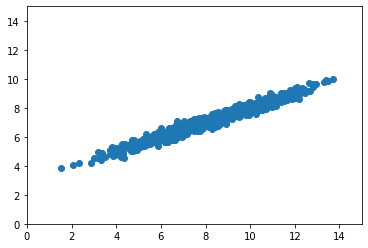

In [3]:
plt.scatter(X, Y)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

In [4]:
class LinearRegression:
    def __init__(self):
        self.coeffs = []
        self.intercept = Value(0.0)
        
    # Set gradients to zero     
    def zero_grad(self):
        for param in self.coeffs + [self.intercept]:
            param.grad = 0
        
    # Loss (MSE) for a single target
    def loss(self, 
             Y_true: Iterable,
             Y_pred: Iterable) -> Value:
        result = 0
        for y_true, y_pred in zip(Y_true, Y_pred):
            result += (y_true - y_pred)**2 
        return result
    
    # Use current parameters to produce predictions
    def predict(self, X: Iterable) -> Iterable:
        preds = []
        for x in X:
            y = 0
            if not isinstance(x, list):
                x = [x]
            for idx, val in enumerate(x):
                y += self.coeffs[idx] * val
            y += self.intercept
            preds.append(y)
        y = np.array(y)
        return preds        
    
    def fit(self,
            X: Iterable,
            Y: Iterable,
            n_iter = 5000,
            batch_size = 100,
            eps = 1e-05,
            lr = 0.0001):
        X = np.array(X)
        Y = np.array(Y)  
        
        # Populate self.coeffs 
        n_coeffs = X.shape[1] if len(X.shape) > 1 else 1
        self.coeffs = [Value(0.0) for _ in range(n_coeffs)]
        
        # Gradient descent optimization (not Stochastic!) 
        for num in range(n_iter):
            # Generate batch
            batch_indices = np.random.randint(0, X.shape[0], size=batch_size)
            X_batch = X[batch_indices]
            Y_batch = Y[batch_indices]
            
            # Forward pass, get predictions and calculate loss
            preds = self.predict(X_batch)
            loss_value = self.loss(Y_batch, preds)
            if num % 100 == 0:
                print(f'{num}: loss = {round(loss_value.data, 3)}')
                
            # Remove gradients from the previous backward passes
            self.zero_grad()
            loss_value.backward()
            steps = []
            
            # "Nudge" every parameter in the opposite direction from gradient
            for p in self.coeffs + [self.intercept]:
                step = lr * p.grad
                p.data -= step
                steps.append(step)
                
            if np.all(np.abs(steps) <= eps):
                print('Early stop')
                break

In [5]:
lr = LinearRegression()
lr.fit(X, Y)
# lr.coeffs.data, lr.intercept.data

0: loss = 5082.11
100: loss = 37.882
200: loss = 31.102
300: loss = 31.226
400: loss = 18.445
500: loss = 17.739
600: loss = 15.128
700: loss = 14.971
800: loss = 13.182
900: loss = 11.466
1000: loss = 9.563
1100: loss = 6.487
1200: loss = 9.549
1300: loss = 7.607
1400: loss = 6.611
1500: loss = 7.5
1600: loss = 6.505
1700: loss = 4.966
1800: loss = 6.658
1900: loss = 4.831
2000: loss = 4.104
2100: loss = 4.329
2200: loss = 4.636
2300: loss = 4.654
2400: loss = 4.86
2500: loss = 5.01
2600: loss = 4.026
2700: loss = 4.217
2800: loss = 3.253
2900: loss = 4.323
3000: loss = 4.654
3100: loss = 5.679
3200: loss = 4.805
3300: loss = 6.73
3400: loss = 4.702
3500: loss = 4.042
3600: loss = 4.422
3700: loss = 3.147
3800: loss = 4.432
3900: loss = 3.79
4000: loss = 5.36
4100: loss = 3.882
4200: loss = 5.935
4300: loss = 3.311
4400: loss = 4.057
4500: loss = 5.042
4600: loss = 4.07
4700: loss = 3.573
4800: loss = 4.626
4900: loss = 4.562


In [6]:
print(f'Target slope: {target_slope}')
print(f'Result slope: {round(lr.coeffs[0].data, 3)} ')

print(f'Target intercept: {target_intercept}')
print(f'Result intercept: {round(lr.intercept.data, 3)} ')

Target slope: 0.5
Result slope: 0.499 
Target intercept: 3
Result intercept: 2.969 


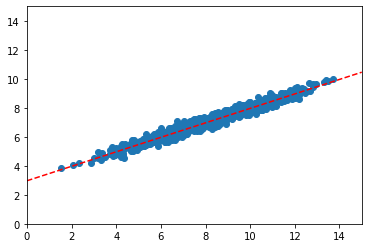

In [7]:
plt.scatter(X, Y)
plt.xlim(0, 15)
plt.ylim(0, 15)
x_vals = np.array(plt.gca().get_xlim())
y_vals = lr.intercept.data + lr.coeffs[0].data * x_vals
plt.plot(x_vals, y_vals, 'r--')
plt.show()